<h1><b>What Is the Relationship between Housing Characteristics and Complaints?</b></h1>

The goal of this exercise is to find the answer to the Question 3 of the problem statement: 

<b>Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?</b>

In this exercise, use the 311 dataset.

You also need to read back the PLUTO dataset from Cloud Object Store that you saved previously in the course. Use the PLUTO dataset for the borough that you already identified to focus on the last exercise.Ensure that you use only a limited number of fields from the dataset so that you are not consuming too much memory during your analysis.

The recommended fields are Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

At the end of this exercise, you should determine whether the type of complaint that you have identified as the response to Question 1 has an obvious relationship with any particular characteristic or characteristics of the houses.

Add your answer to this question along with code and comments in a separate notebook. Upload the notebook in the subsection called "Question 3 - Does the Complaint Type, that you identified in response to Question 1, have an obvious relationship with any particular characteristic(s) of the Houses?" in the section "Submit your work and Review your Peer's work" in the module "Submit Your Work and Grade Your Peers".


In [7]:
#IMPORT THE LIBRARIES

import pandas as pd
import matplotlib.pylab as plt

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import os

In [8]:
#FUNCTIONS DEFINED TO UPLOAD/DOWNLOAD TO OBJECT STORE

from ibm_botocore.client import Config
import ibm_boto3
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded : ' + local_file_name)

from ibm_botocore.client import Config
import ibm_boto3

def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [10]:
#DOWNLOAD THE FILE USING THE DEFINED FUNCTIONS ABOVE
download_file_cos(credentials,'311_ALL.pkl','311_ALL.pkl')

#READ IN THE PICKLE FILE THAT WAS DOWNLOADED
df_311 = pd.read_pickle('311_ALL.pkl')

File Downloaded


In [11]:
df_311

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-28T11:49:21.000,43915077,PAINT/PLASTER,11385.0,1711 HIMROD STREET,HIMROD STREET,ADDRESS,Ridgewood,The following complaint conditions are still o...,QUEENS,40.705446,-73.914524,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-28T19:43:42.000,43915957,APPLIANCE,10458.0,2700 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.867269,-73.893454,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-28T13:55:54.000,43914291,HEAT/HOT WATER,11417.0,86-07 SUTTER AVENUE,SUTTER AVENUE,ADDRESS,Ozone Park,The complaint you filed is a duplicate of a co...,QUEENS,40.675885,-73.850473,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-28T05:58:43.000,43915680,HEAT/HOT WATER,10002.0,575 GRAND STREET,GRAND STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.713707,-73.979140,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-28T16:14:09.000,43914296,HEAT/HOT WATER,11233.0,1711 FULTON STREET,FULTON STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.679340,-73.930435,NaN,RESIDENTIAL BUILDING,Open
5,2019-09-21T19:32:32.000,43859586,UNSANITARY CONDITION,10458.0,2630 MARION AVENUE,MARION AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.864302,-73.891116,NaN,RESIDENTIAL BUILDING,Open
6,2019-09-28T21:11:04.000,43915372,UNSANITARY CONDITION,10452.0,185 WEST 170 STREET,WEST 170 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.841933,-73.925834,NaN,RESIDENTIAL BUILDING,Open
7,2019-09-28T12:28:11.000,43914314,SAFETY,10032.0,38 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.836707,-73.944433,NaN,RESIDENTIAL BUILDING,Open
8,2019-09-28T10:23:09.000,43915728,WATER LEAK,10452.0,1115 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.834637,-73.924299,NaN,RESIDENTIAL BUILDING,Open
9,2019-09-28T18:04:33.000,43915433,FLOORING/STAIRS,10031.0,3481 BROADWAY,BROADWAY,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.824609,-73.951793,NaN,RESIDENTIAL BUILDING,Open


In [12]:
#CONVERT EVERYTHING TO UPPERCASE AND REMOVE ANY POSSIBLE SPACES IN FRONT OR BACK OF THE DATA
df_311['complaint_type'] = df_311['complaint_type'].str.upper() 
df_311['complaint_type'] = df_311['complaint_type'].str.strip()

df_311['incident_address'] = df_311['incident_address'].str.upper() 
df_311['incident_address'] = df_311['incident_address'].str.strip()

df_311['city'] = df_311['city'].str.upper() 
df_311['city'] = df_311['city'].str.strip()

#MAKE SURE THAT THE COMPLAINT_TYPES ALL MATCH. PAINT/PLASTER AND PAINT - PLASTER ARE THE SAME THING, SO WE WILL MAKE THEM A SINGLE CATAGORICAL VALUE
df_311['complaint_type'] = df_311['complaint_type'].str.replace('PAINT/PLASTER','PAINT - PLASTER')

#FIX THE ZIP CODES WHICH ARE FLOATS
df_311.incident_zip = df_311.incident_zip.fillna(0)
df_311.incident_zip = df_311.incident_zip.astype(int)

In [13]:
#DOWNLOAD THE BRONX FILES
download_file_cos(credentials, 'BX_18v1.pkl', 'BX_18v1.pkl')
df_BX = pd.read_pickle('BX_18v1.pkl')

File Downloaded


In [14]:
df_BX.head(2)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


In [15]:
df_BX_reduced = df_BX[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']].copy()

In [16]:
#DELETE THE OLD DATAFRAME AND FREE MEMORY, AT LEAST IN THE PYTHON ENVIRONMENT, TO OTHER RESOURCES FOR OUR ENVIRONMENT
#TODO: POSSIBLE CALL TO GC?
del df_BX

In [17]:
#DEBUG
#df_BX_reduced.head()

In [18]:
#FIX THE ZIP CODES WHICH ARE FLOATS
df_BX_reduced.ZipCode = df_BX_reduced.ZipCode.fillna(0)
df_BX_reduced.ZipCode = df_BX_reduced.ZipCode.astype(int)

In [19]:
#DEBUG
#df_BX_reduced.head()

In [20]:
#FILTER OUT ONLY THE HEAT/HOT WATER SINCE WE DECIDED TO ONLY FOCUS ON THIS PER THE DIRECTIONS
df_311_Heat = df_311[df_311['complaint_type'].str.contains("HEAT/HOT WATER")]

In [21]:
#DEBUG
#df_311_Heat

In [22]:
df_311_HEAT_BRONX = df_311[['incident_zip', 'incident_address', 'location_type']].copy()

In [23]:
del df_311

In [24]:
df_311_HEAT_BRONX['counts'] = 1

In [25]:
#DEBUG
#df_311_HEAT_BRONX.head(5)

In [26]:
df_311_HEAT_BRONX_group = df_311_HEAT_BRONX.groupby(['incident_address']).count()['counts']

In [27]:
df_311_HEAT_BRONX_group = df_311_HEAT_BRONX_group.reset_index()

In [28]:
# DEBUG
#df_311_HEAT_BRONX_group.head()

In [29]:
joinedFinal = df_BX_reduced.set_index('Address').join(df_311_HEAT_BRONX_group.set_index('incident_address'))

In [30]:
joinedFinal = joinedFinal.reset_index()

In [31]:
#FIX THE ZIP CODES WHICH ARE FLOATS
joinedFinal.counts = joinedFinal.counts.fillna(0)
joinedFinal.counts = joinedFinal.counts.astype(int)

In [32]:
joinedFinal = joinedFinal.rename(columns={"index":"Address"})

In [33]:
#FILTER ALL THE EVENTS THAT ARE GREATER THAN 0
joinedFinal = joinedFinal[joinedFinal.counts > 0]

In [34]:
#DEBUG
#joinedFinal.head(4)

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,counts
6,1 CAROLL STREET,6814,21.00,0.51,0.0,1.0,164,13320,111.00,5,...,0,6814,0.60,0,1930,1994,10464,247256.0,1042382.0,21
10,1 DOROTHEA PLACE,2395,31.00,0.35,0.0,2.0,85,6813,125.00,2,...,0,2395,0.90,0,1920,0,10458,253669.0,1014235.0,1
14,1 EAST 198 STREET,58962,101.00,4.37,0.0,6.5,29,13500,111.00,1,...,0,56462,6.02,2500,1941,0,10468,256755.0,1013989.0,242
20,1 GABRIEL DRIVE,5280,44.00,1.12,0.0,2.0,200,4726,86.71,1,...,0,5080,0.90,0,1991,0,10469,253879.0,1025411.0,1
25,1 PATRICIA LANE,46200,0.00,0.50,0.5,1.0,7501,91506,0.00,4,...,0,46200,0.60,0,2002,0,10465,237713.0,1038203.0,7
29,1 PLOUGHMANS BUSH,1864,26.00,0.32,0.0,1.0,517,5818,119.92,1,...,0,1864,0.50,0,1930,0,10471,264412.0,1008541.0,1
41,1 WEST TREMONT AVENUE,31460,120.00,1.51,3.4,6.5,1,20800,120.00,2,...,0,0,6.02,6130,1925,0,10453,249742.0,1009291.0,1
45,10 CLINTON PLACE,2646,63.00,1.06,0.0,4.8,48,2500,100.00,1,...,0,2646,3.44,0,1931,0,10453,251307.0,1010312.0,23
47,10 EAST 198 STREET,70800,96.00,5.83,0.0,6.5,114,12150,106.00,1,...,0,69000,6.02,1800,1941,0,10468,256647.0,1013844.0,245
64,10 WEST 182 STREET,47000,87.00,4.70,0.0,4.0,61,10000,100.00,1,...,0,47000,4.00,0,1927,0,10453,251531.0,1010446.0,400


In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#SEPERATE ANALYSIS FOR CATAGORICAL DATA. YOU WOULDN'T WANT TO USE COORELATION
df_joinedFinal_cat = joinedFinal[['YearBuilt', 'YearAlter1', 'ZipCode', 'Lot', 'counts']].copy()

In [63]:
#WE WILL USE THIS DATA FOR THE CORRELATION MATRIX
df_joinedFinal_NoCat = joinedFinal[['BldgArea', 'BldgDepth', 'CommFAR', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'counts']].copy()

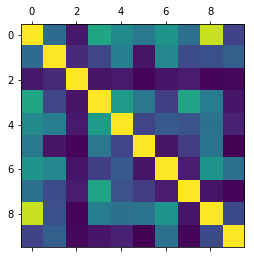

In [64]:
#CORRELATION MATRIX TO VISUALIZE IF THERE IS ANY RELATIONSHIPS TO COUNT

import matplotlib.pyplot as plt

plt.matshow(df_joinedFinal_NoCat.corr())
plt.show()

In [65]:
#IN CASE WE WANT THE NUMBERS
df_joinedFinal_NoCat.corr()

,BldgArea,BldgDepth,CommFAR,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,counts
BldgArea,1.000000,0.333715,0.040783,0.582694,0.463024,0.391299,0.505893,0.348697,0.912288,0.180912
BldgDepth,0.333715,1.000000,0.099176,0.195395,0.415666,0.032336,0.454090,0.212156,0.226806,0.284859
CommFAR,0.040783,0.099176,1.000000,0.028810,0.050643,-0.007489,0.035574,0.056033,-0.004202,-0.000917
LotArea,0.582694,0.195395,0.028810,1.000000,0.537533,0.384118,0.166030,0.574114,0.404577,0.040018
LotDepth,0.463024,0.415666,0.050643,0.537533,1.000000,0.190009,0.267290,0.239012,0.359252,0.074225
NumBldgs,0.391299,0.032336,-0.007489,0.384118,0.190009,1.000000,0.028880,0.153454,0.368518,-0.023409
NumFloors,0.505893,0.454090,0.035574,0.166030,0.267290,0.028880,1.000000,0.056707,0.504391,0.355388
OfficeArea,0.348697,0.212156,0.056033,0.574114,0.239012,0.153454,0.056707,1.000000,0.033300,-0.009298
ResArea,0.912288,0.226806,-0.004202,0.404577,0.359252,0.368518,0.504391,0.033300,1.000000,0.206308
counts,0.180912,0.284859,-0.000917,0.040018,0.074225,-0.023409,0.355388,-0.009298,0.206308,1.000000


In [66]:
df_Cors = df_joinedFinal_NoCat.corr()

In [67]:
df_Cors['counts'].reset_index().sort_values(by=['counts'])

,index,counts
5,NumBldgs,-0.023409
7,OfficeArea,-0.009298
2,CommFAR,-0.000917
3,LotArea,0.040018
4,LotDepth,0.074225
0,BldgArea,0.180912
8,ResArea,0.206308
1,BldgDepth,0.284859
6,NumFloors,0.355388
9,counts,1.000000


In [68]:
#FOR NON-CATAGORCAL DATA, IT LOOKS LIKE THE NUMBER OF FLOORS IS THE MOST COORELATED TO THE NUMBER OF COMPLAINTS.

In [70]:
df_joinedFinal_cat.head(3)

,YearBuilt,YearAlter1,ZipCode,Lot,counts
6,1930,1994,10464,164,21
10,1920,0,10458,85,1
14,1941,0,10468,29,242


In [113]:
#SOME FILTERING OF THE DATA TO AVOID SKEWING.
df_joinedFinal_cat = df_joinedFinal_cat[df_joinedFinal_cat.YearBuilt > 1890]
df_joinedFinal_cat = df_joinedFinal_cat[df_joinedFinal_cat.counts > 1]
df_joinedFinal_cat = df_joinedFinal_cat[df_joinedFinal_cat.counts < 2000]

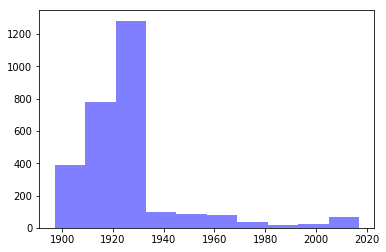

In [114]:
#FOR FUN, WE LOOK AT THE NUMBER OF HOMES BUILT IN A CERTAIN YEAR.
num_bins = 10
n, bins, patches = plt.hist(df_joinedFinal_cat.YearBuilt, num_bins, facecolor='blue', alpha=0.5)
plt.show()

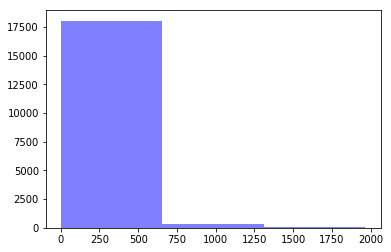

In [95]:
#WE CAN ALSO VIEW THE NUMBER OF COMPLAINTS
num_bins = 3
n, bins, patches = plt.hist(df_joinedFinal_cat.counts, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [115]:
#OUTLIERS KEEP SKEWING THE DATA, IN WHICH CASE WE WOULD JUST LOOK FOR THE UPPER. LOOKING AT CALLS 500 OR LESS.
df_joinedFinal_cat = df_joinedFinal_cat[df_joinedFinal_cat.counts < 500]

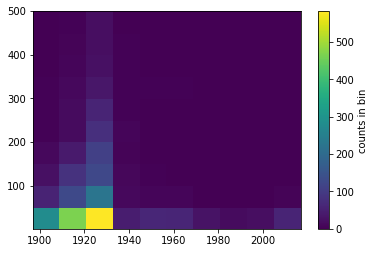

In [116]:
plt.hist2d(df_joinedFinal_cat.YearBuilt, df_joinedFinal_cat.counts, bins=10)
cb = plt.colorbar()
cb.set_label('counts in bin')

From this, we would want to conclude that heating issues will happen with older places. However, if you look at the data above, it has way more older homes in it (likely because there is not as much development as of recent in the Bronx.)

In [111]:
df_joinedFinal_cat = df_joinedFinal_cat[df_joinedFinal_cat.YearAlter1 > 1]

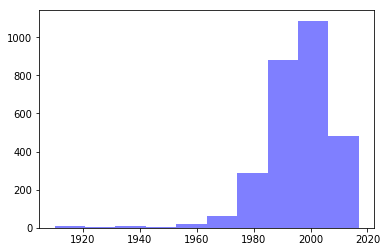

In [112]:
#FOR FUN, WE LOOK AT THE NUMBER OF HOMES BUILT IN A CERTAIN YEAR.
num_bins = 10
n, bins, patches = plt.hist(df_joinedFinal_cat.YearAlter1, num_bins, facecolor='blue', alpha=0.5)
plt.show()

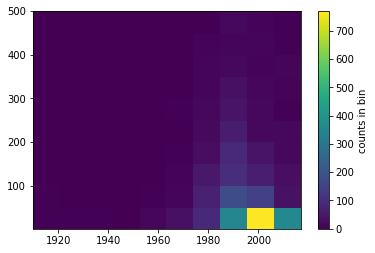

In [117]:
plt.hist2d(df_joinedFinal_cat.YearAlter1, df_joinedFinal_cat.counts, bins=10)
cb = plt.colorbar()
cb.set_label('counts in bin')

It actually looks like anythign altered in 1990 is going to have issue, even though 2000 has a much greater representation in the data.

To answer the question:

<b>Question 3 - Does the Complaint Type, that you identified in response to Question 1, have an obvious relationship with any particular characteristic(s) of the Houses?</b>

It appears that building height and if the building has been altered have a relationship to HEAT/HOT WATER issues. Other factors might include older buildings and the building depth.

In [ ]:
#TODO:

#Pearson Correlation 
#Feature Importance function from Random Forest algorithm 
#Feature Importance function from XGBoost algorithm 